# Keras

Cтроить модели на чистом [Tensorflow](https://www.tensorflow.org) или [Theano](http://www.deeplearning.net/software/theano) неудобно, особенно с учетом того, что  нейронная сеть часто состоит из вполне определенных паттернов. Логично, что имеется большое количество более высокоуровневых библиотек и фреймворков различного назначения, некоторые, в том числе, позволяют декларативно описывать архитектуру нейронной сети: 
- [Caffe2](https://caffe2.ai)
- [Lasagne](https://github.com/Lasagne/Lasagne)
- [Torch](https://torch.ch/)
- [PyTorch](https://pytorch.org)
- [Keras](https://keras.io/)
- 

[Keras](https://keras.io/) - это библиотека, котороая позволяет декларативно описать топологию сети, методы оптимизации, регуляризаторы и многое другое. В качестве бекэнда используется *Theano* или *Tensorflow*. 

Привидем пример реализации простого классификатора рупокисных цифр (MNIST) на *Keras*:

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as ds

%matplotlib inline

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist

Загружаем цифры

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


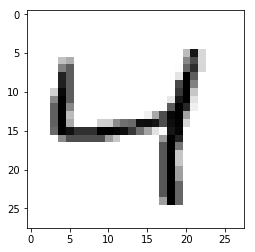

In [5]:
plt.imshow(X_train[2], cmap=plt.cm.gray_r)

Описываем нейронную сеть по слоям:

In [6]:
model = Sequential()
# первый полносвязный слой принимает на вход 28*28 чисел (размер картинки) и имеет 200 нейронов
model.add(Dense(200, input_shape=(28 * 28,)))
# применяем к нему ReLU - активацию
model.add(Activation('relu'))
# дальше drop out с коэффицентом 0.2
model.add(Dropout(0.2))
# последний слой с 10 нейронами (у нас 10 классов) и softmax
model.add(Dense(10))
model.add(Activation('softmax'))

Бинаризуем наши классы, пример:
[0, 1, 1, 2] -> 
[[1, 0, 0], 
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1]]

In [7]:
Y_cat_train = np_utils.to_categorical(Y_train)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(), metrics=['accuracy'])

Запускаем обучение:

In [9]:
history = model.fit(X_train.reshape((-1, 28*28)), Y_cat_train,
                    batch_size=500, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 6.5170 - acc: 0.5873
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 4.0140 - acc: 0.7434
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 3.0403 - acc: 0.8044
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 2.7626 - acc: 0.8218
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 2.6054 - acc: 0.8318
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 2.4895 - acc: 0.8390
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 1.9610 - acc: 0.8711
Epoch 8/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.9282 - acc: 0.9345
Epoch 9/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.8059 - acc: 0.9427
Epoch 10/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.7313 - acc: 0.9476

Тестируем

In [10]:
model.evaluate(X_test.reshape((-1, 28*28)), 
               np_utils.to_categorical(Y_test), verbose=0)

[0.60406185019274339, 0.95699999999999996]

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


# Пример

Приведем искусственный пример, для того чтобы изучить влияние числа нейронов в скрытом слое, регуляризации и функции активации. 

In [12]:
X, Y = ds.make_moons(n_samples=150)
X *= 40.

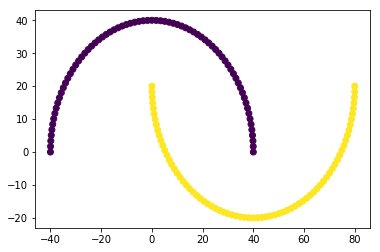

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

Обучим многослойный перцептрон, зададим число нейронов в скрытом слое и параметр регуляризации.

In [14]:
def train_model(X_train, Y_train, hidden_size=5, reg=0.0001):
    model = Sequential()
    model.add(Dense(hidden_size, kernel_regularizer=l2(reg), bias_regularizer=l2(reg), 
                input_shape=(2,)))    
    model.add(Activation('relu'))    
        
    model.add(Dense(1, kernel_regularizer=l2(reg), bias_regularizer=l2(reg)))
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=SGD(), metrics=['accuracy'])
   
    history = model.fit(X_train, Y_train,
                    batch_size=10, epochs=100, verbose=False)
     
    print(history.history['acc'][-1])        
        
    return model

In [15]:
def vis_model(ax, model, X_train, Y_train):
    x_lim = np.min(X_train[:, 0]), np.max(X_train[:, 0])
    y_lim = np.min(X_train[:, 1]), np.max(X_train[:, 1])
    xx, yy = np.meshgrid(np.linspace(*x_lim, 150), 
                         np.linspace(*y_lim, 150))
    zz = model.predict(np.array([(p1, p2) for (p1, p2) in zip(xx.ravel(), yy.ravel())]))
    ax.pcolormesh(xx, yy, zz.reshape(xx.shape) >= 0.5, cmap=plt.cm.get_cmap('Set2'))
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y)

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

0.866666654746


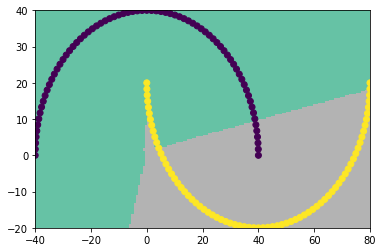

In [16]:
model = train_model(X, Y, 50, 0.)
vis_model(plt.gca(), model, X, Y)    

0.873333334923
0.873333326976
0.859999994437
0.866666662693


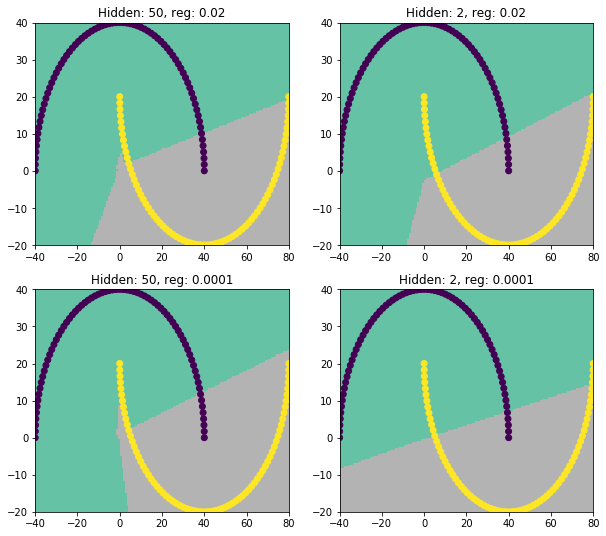

In [17]:
f, axis = plt.subplots(2, 2)
f.set_size_inches(10, 9)

args = [(50, 0.02), (2, 0.02), (50, 0.0001), (2, 0.0001)]

for (hiden_size, reg), ax in zip(args, axis.ravel()):
    model = train_model(X, Y, hiden_size, reg)
    ax.title.set_text('Hidden: {}, reg: {}'.format(hiden_size, reg))
    vis_model(ax, model, X, Y) 